# Forward and Back Propagation

![](https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif)
</br>
Source: machinelearningknowledge.ai

# 1. Forward Propagation

> The process of computing the output of a neural network given an input. It involves passing the input through the network's layers, applying the activation functions, and calculating the final output.

The steps involved in forward propagation are as follows:

1. **Initialize the input values**: The input values are the features or variables that are fed into the neural network. These values are typically represented as a vector or matrix.

2. **Multiply the input values by the weights of the first layer and add the biases**: Each layer in the neural network has weights and biases associated with it. The weights determine the strength of the connections between the neurons, while the biases provide an additional constant term. In forward propagation, the input values are multiplied by the weights of the first layer and the biases are added.

3. **Apply the activation function to the result**: After multiplying the input values by the weights and adding the biases, the result is passed through an activation function. The activation function introduces non-linearity into the network and helps in capturing complex patterns in the data.

4. **Repeat steps 2 and 3 for each subsequent layer until the final output is obtained**: The process of multiplying the input values by the weights, adding the biases, and applying the activation function is repeated for each subsequent layer in the neural network. This allows the network to learn and extract higher-level features from the input data.

The output obtained from forward propagation is then used to calculate the loss or error of the network.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
    """
    Sigmoid function:
    - Returns the sigmoid activation of x.
    """
    return 1 / (1 + np.exp(-x))

def forward_propagation(X, parameters):
    """
    Perform forward propagation for a neural network.
    
    Arguments:
    X -- input data, numpy array of shape (input_size, m)
    parameters -- dictionary containing the parameters of the neural network
    
    Returns:
    A2 -- output of the neural network's forward propagation
    cache -- dictionary containing the intermediate values needed for backward propagation
    """
    # Retrieve parameters from the dictionary
    W1 = parameters['W1'] # weights matrix of first layer
    b1 = parameters['b1'] # bias vector of first layer
    W2 = parameters['W2'] # weights matrix of second layer
    b2 = parameters['b2'] # bias vector of second layer
    
    # Implement forward propagation
    Z1 = np.dot(W1, X) + b1 
    A1 = np.tanh(Z1) 
    Z2 = np.dot(W2, A1) + b2 
    A2 = sigmoid(Z2)
    
    # Cache intermediate values for backward propagation
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    
    return A2, cache

# 2. Backward Propagation

> Also known as backpropagation, is the process of updating the weights and biases of a neural network based on the calculated error. It involves propagating the error backwards through the network and adjusting the parameters to minimize the error.

The steps involved in backward propagation are as follows:

1. **Calculate the gradient of the loss function with respect to the output**: The loss function measures the discrepancy between the predicted output of the neural network and the actual output. The gradient of the loss function with respect to the output is calculated to determine the direction and magnitude of the error.

2. **Propagate the gradient backwards through the layers, calculating the gradients of the loss function with respect to the weights and biases of each layer**: The gradient of the loss function is propagated backwards through the layers of the neural network. This involves calculating the gradients of the loss function with respect to the weights and biases of each layer using the chain rule of calculus.

3. **Update the weights and biases of each layer using the calculated gradients and a learning rate**: The gradients calculated in the previous step are used to update the weights and biases of each layer. The learning rate determines the step size of the parameter updates and helps in controlling the convergence of the network.

By iteratively performing forward and backward propagation, a neural network can learn to improve its predictions and minimize the error.


In [5]:
def backward_propagation(X, Y, cache, parameters, learning_rate):
    """
    Perform backward propagation for a neural network and update the parameters.
    
    Arguments:
    X -- input data, numpy array of shape (input_size, m)
    Y -- true labels, numpy array of shape (output_size, m)
    cache -- dictionary containing the intermediate values from forward propagation
    parameters -- dictionary containing the parameters of the neural network
    learning_rate -- learning rate for parameter updates
    
    Returns:
    parameters -- updated parameters after backward propagation
    """
    # Retrieve parameters from the dictionary
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve intermediate values from the cache
    A1 = cache['A1']
    A2 = cache['A2']

    m = X.shape[1]  # Get the number of training examples
    
    # Calculate loss function gradients using chain rule
    dZ2 = A2 - Y # derivative of the loss function with respect to Z2
    dW2 = (1 / m) * np.dot(dZ2, A1.T) # derivative of the loss function with respect to W2
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True) # derivative of the loss function with respect to b2
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2)) # derivative of the loss function with respect to Z1
    dW1 = (1 / m) * np.dot(dZ1, X.T) # derivative of the loss function with respect to W1
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True) # derivative of the loss function with respect to b1
    

    # Update parameters using gradient descent optimization
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    # Update the parameters dictionary
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return parameters

In [ ]:
def compute_cost(A2, Y):
    """
    Compute the mean squared error cost after a number of iterations.
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    cost -- mean squared error cost
    """
    
    m = Y.shape[1]  # number of examples

    # Compute the mean squared error
    cost = (1./m) * np.sum((A2 - Y)**2)

    return cost


### Now, let's perform forward and back propagation in a simple neural network architecture.

![alt text](Misc/simplenn.png)

Input Layer: This is the layer where the network takes in the inputs. The number of neurons in this layer is equal to the number of features in your input data.

Hidden Layer: This is the layer where the network learns to represent the input data. The number of neurons in this layer can be chosen arbitrarily, but it's often chosen to be a number between the number of input neurons and the number of output neurons.

Output Layer: This is the layer where the network outputs its predictions. The number of neurons in this layer is equal to the number of classes you're trying to predict (for classification tasks) or 1 (for regression tasks).



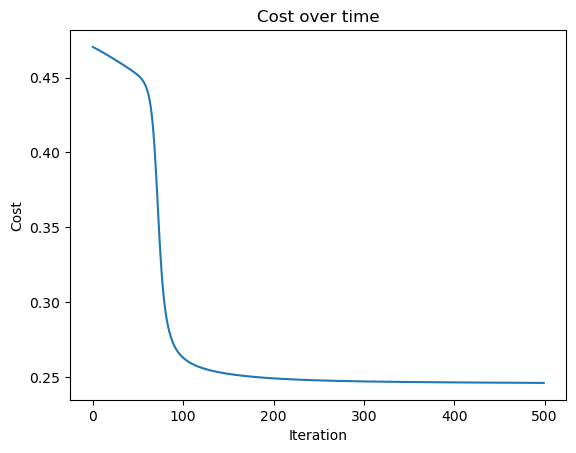

In [14]:
# Initialize random parameters for a neural network with 2 input units, 3 hidden units, and 1 output unit
np.random.seed(0)
parameters = {
    'W1': np.random.randn(3, 2),  # 3x2 matrix for weights of the first layer (3 connections for each of the 2 neurons in the input layer)
    'b1': np.random.randn(3, 1),  # 3x1 matrix for biases of the first layer (3 neurons in the hidden layer)
    'W2': np.random.randn(1, 3),  # 1x3 matrix for weights of the second layer (1 connection for each of the 3 neurons in the hidden layer)
    'b2': np.random.randn(1, 1)   # 1x1 matrix for biases of the second layer (1 neuron in the output layer)
}

# Dummy input data
X = np.array([[1, 2], [3, 4]]).T  # 2x2 matrix, transpose to match the shape (input_size, m, where m is the number of examples)

# Dummy true labels
Y = np.array([[1, 0]])  # 1x2 matrix for true labels

# List to store costs
costs = []

# Number of iterations for training
num_iterations = 500

# Perform forward and backward propagation for a number of iterations
for i in range(num_iterations):
    A2, cache = forward_propagation(X, parameters)
    parameters = backward_propagation(X, Y, cache, parameters, learning_rate=0.01)
    cost = compute_cost(A2, Y)
    costs.append(cost)

# Plot the cost over time
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost over time')
plt.show()

# 3. Final Thoughts

## 3.1. Loss

In the context of neural networks, loss refers to a measure of how well the network is performing on a given task. It quantifies the `discrepancy between the predicted output of the network and the actual output`. The goal of training a neural network is to minimize this loss, which indicates that the network is making accurate predictions.

There are various types of loss functions that can be used depending on the task at hand. For example, `in classification tasks, the cross-entropy loss is commonly used`, while `in regression tasks, the mean squared error (MSE) loss is often used`. The choice of loss function depends on the specific problem and the desired behavior of the network.


## 3.2. Gradient
The gradient is a mathematical concept that represents the `rate of change of a function at a particular point`. In the context of neural networks, the gradient is used to determine the `direction and magnitude of the error` during the training process.

During training, the network calculates the gradient of the loss function with respect to the network's parameters, such as the weights and biases. This gradient provides information about `how the loss function changes as the parameters are adjusted`. By following the gradient, the network can update its parameters in a way that reduces the loss and improves its performance.

## 3.3. Optimizers
Responsible for updating the weights and biases of the neural network during training. It determines how the model learns from the training data and adjusts the parameters. The goal of an optimizer is to minimize the loss (or cost) by adjusting the parameters of the model.

> Note: The loss function deals with a single data instance, whereas the cost function measures the model's error on a group of objects (it is usually the average of the loss functions for each training example in the dataset).

### *3.3.1. How Optimizers Work*

Optimizers work by iteratively updating the parameters (weights and biases) of the neural network based on the gradients of the loss function with respect to these parameters. The gradients indicate the direction of steepest ascent or descent in the loss landscape. By following the `negative gradient direction`, the optimizer can find the optimal values for the parameters that minimize the loss.

The update rule for the parameters is typically based on the gradient descent algorithm. The general steps of the gradient descent algorithm are as follows:

1. **Initialization**: The optimizer initializes the weights and biases of the neural network with small random values.

2. **Forward Pass**: The optimizer performs a forward pass through the network to compute the predicted outputs.

3. **Loss Calculation**: The optimizer calculates the loss between the predicted outputs and the true labels using a loss function.

4. **Backward Pass**: The optimizer performs a backward pass through the network to compute the gradients of the loss with respect to the parameters.

5. **Parameter Update**: The optimizer updates the parameters using the gradients and a learning rate. The learning rate determines the step size of the parameter update.

6. **Repeat**: Steps 2-5 are repeated for a specified number of iterations or until convergence.

![](https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif)
</br>
Source: machinelearningknowledge.ai

### *3.3.2. Different types of Optimizers*

There are various types of optimizers available, each with its own advantages and disadvantages. Here are some commonly used optimizers:

1. **Stochastic Gradient Descent (SGD)**: SGD is a basic optimization algorithm that updates the parameters based on the gradients of a randomly selected subset of training samples. It is computationally efficient but can be sensitive to the learning rate.

2. **Adam**: Adam is an adaptive optimization algorithm that combines the advantages of both AdaGrad and RMSProp. It adapts the learning rate for each parameter based on the estimates of the first and second moments of the gradients. Adam is widely used and performs well in practice.

3. **Adagrad**: Adagrad adapts the learning rate for each parameter based on the historical gradients. It performs larger updates for infrequent parameters and smaller updates for frequent parameters. Adagrad is suitable for sparse data and can converge quickly, but its learning rate can become too small over time.

4. **RMSProp**: RMSProp is an adaptive optimization algorithm that uses a moving average of the squared gradients to adjust the learning rate. It reduces the learning rate for parameters with large gradients and increases it for parameters with small gradients. RMSProp is effective in handling non-stationary objectives.

5. **Momentum**: Momentum adds a fraction of the previous parameter update to the current update. It helps accelerate convergence and overcome local minima. Momentum can be seen as a ball rolling down a hill, gaining momentum as it goes.

6. **Nesterov Accelerated Gradient (NAG)**: NAG is an extension of momentum that calculates the gradient at a point slightly ahead in the direction of the momentum. It improves the convergence speed by reducing the oscillations.

These are just a few examples of optimizers commonly used in neural network training. Each optimizer has its own characteristics and is suitable for different types of problems. It is important to experiment with different optimizers and tune their hyperparameters to achieve the best performance for a specific task.
